In [2]:
# https://zhuanlan.zhihu.com/p/59555007
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

### Checking how the data is distributed

In [6]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df[df['quality'] == 3][['fixed acidity', 'quality']]

,fixed acidity,quality
459,11.6,3
517,10.4,3
690,7.4,3
832,10.4,3
899,8.3,3
1299,7.6,3
1374,6.8,3
1469,7.3,3
1478,7.1,3
1505,6.7,3


### Information about the data columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### The dataset primarily contains values of float data types

### Some plotting to know how the data columns are distributed in the dataset

#### Fixed acidity does not give any specification to classify the quality

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

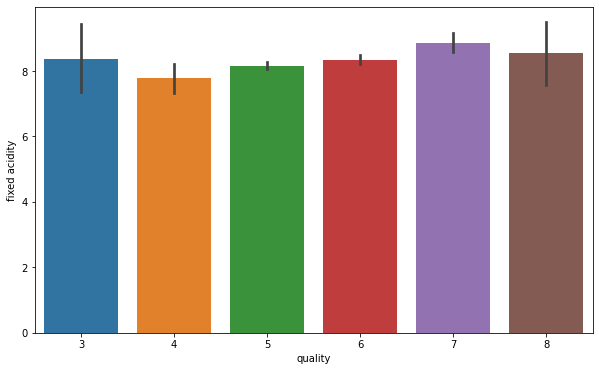

In [4]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

#### There is a downing trend in the volatile acidity as we go higher the quality 挥发酸
http://www.wineshe.com/959.p

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

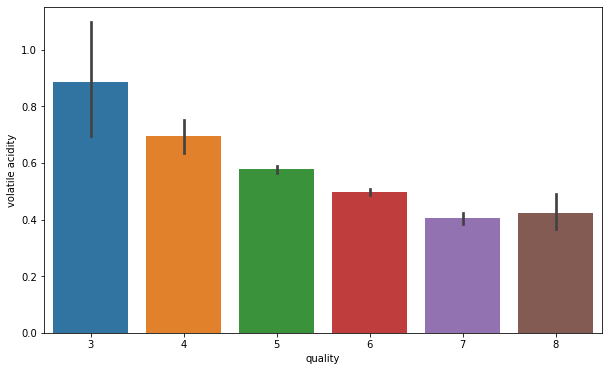

In [5]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

#### Citric acid go higher as we go higher in the quality of the wine 柠檬酸

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

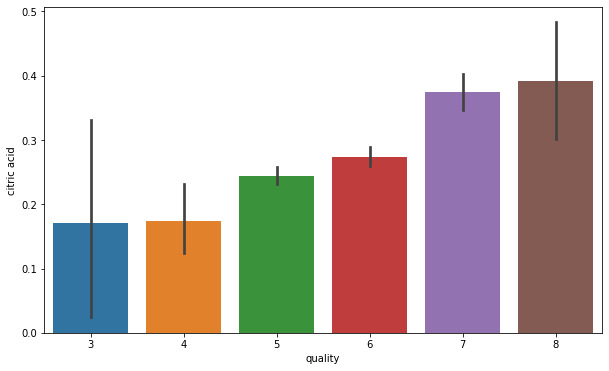

In [6]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

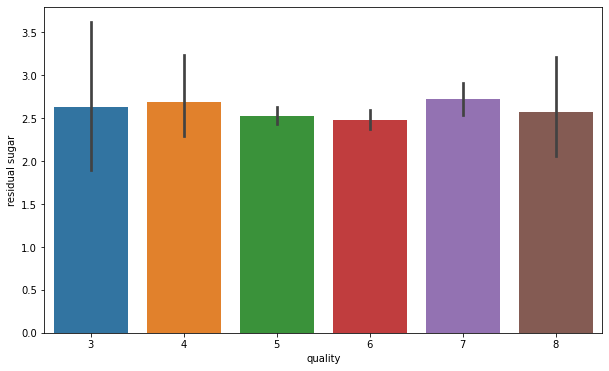

In [7]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

#### Chloride goes down as we go higher in the quality of the wine

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

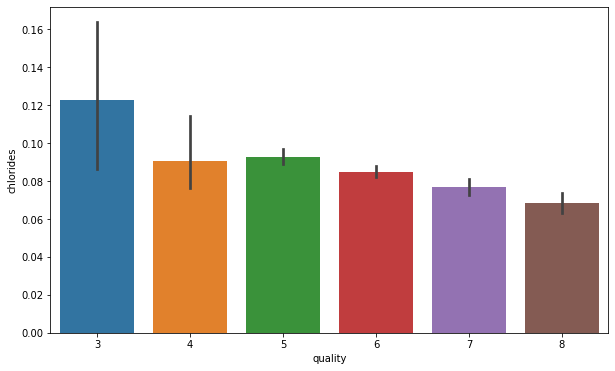

In [8]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

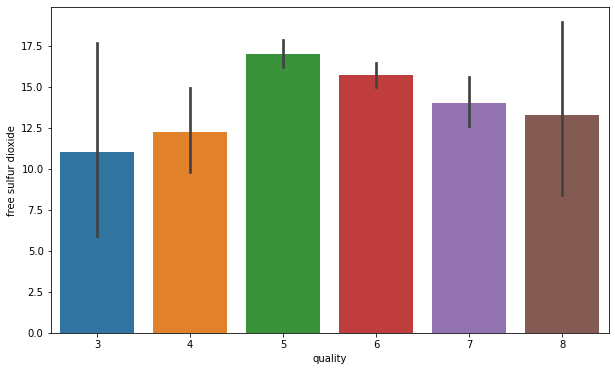

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

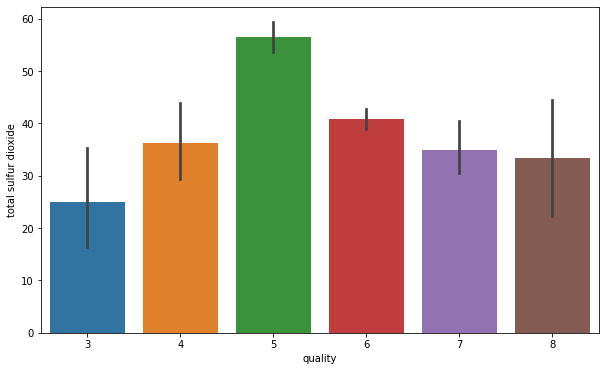

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

#### Sulphates level goes higher with the quality of wine

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

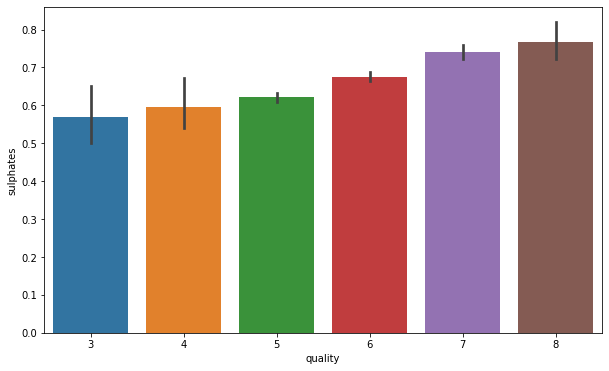

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

#### Alcohol level also goes higher as te quality of wine increases

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

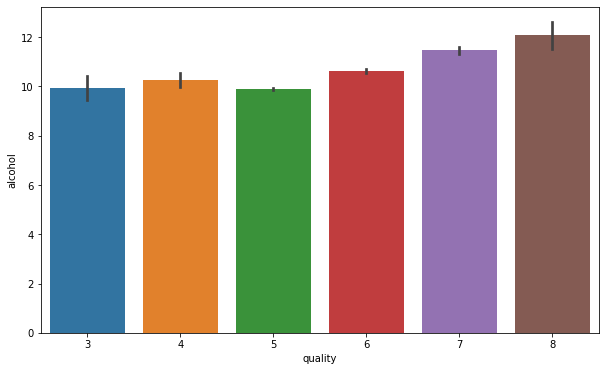

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

### Correlation

<AxesSubplot:>

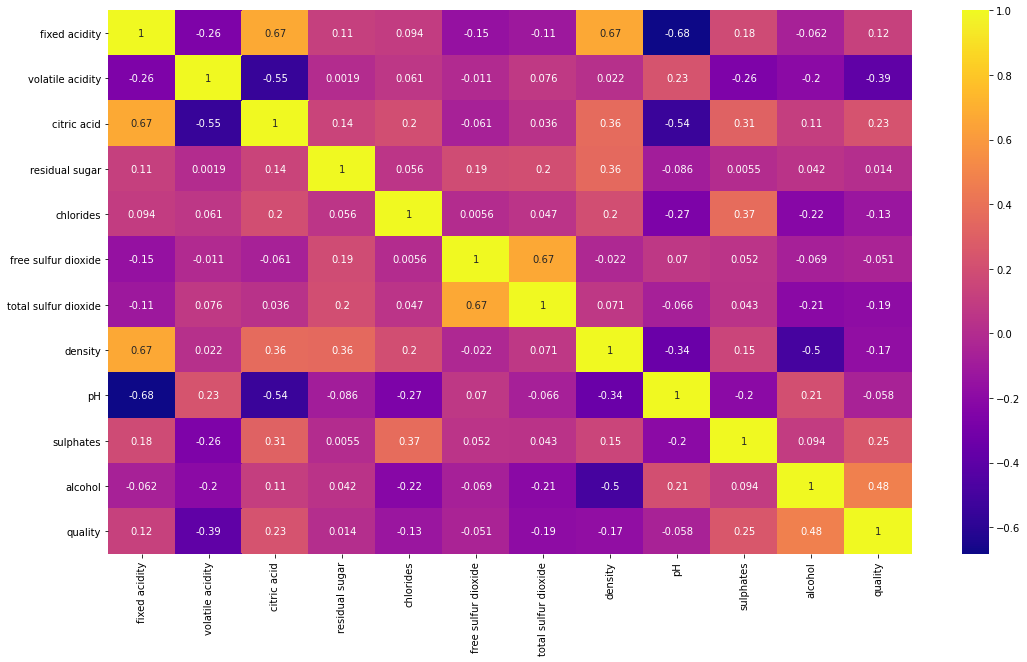

In [13]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.plasma)

### Scatterplot Analysis¶

Since we found out through correlation plots about certain columns having good correlation, let's make a scatter plot matrix that will tell us about the columns that had good correlations

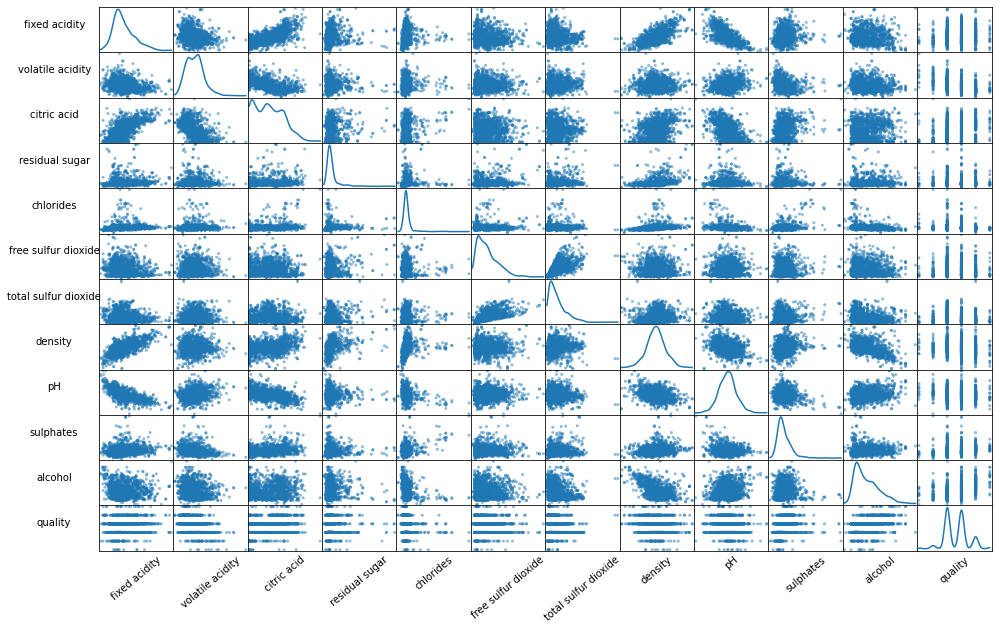

In [14]:
from pandas.plotting import scatter_matrix

sm = scatter_matrix(df, figsize=(16, 10), diagonal='kde')

[s.xaxis.label.set_rotation(40) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure

[s.get_yaxis().set_label_coords(-0.6,0.5) for s in sm.reshape(-1)]

#Hide all ticks

[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()

#### Analysis
Here we can observe positive linear correlation between the higly correlated columns, for instance fixed acidity and density columns had correlation value of 0.67 and the scatter plot shows the high correlation of it

### Histogram and Density Plots of Columns¶

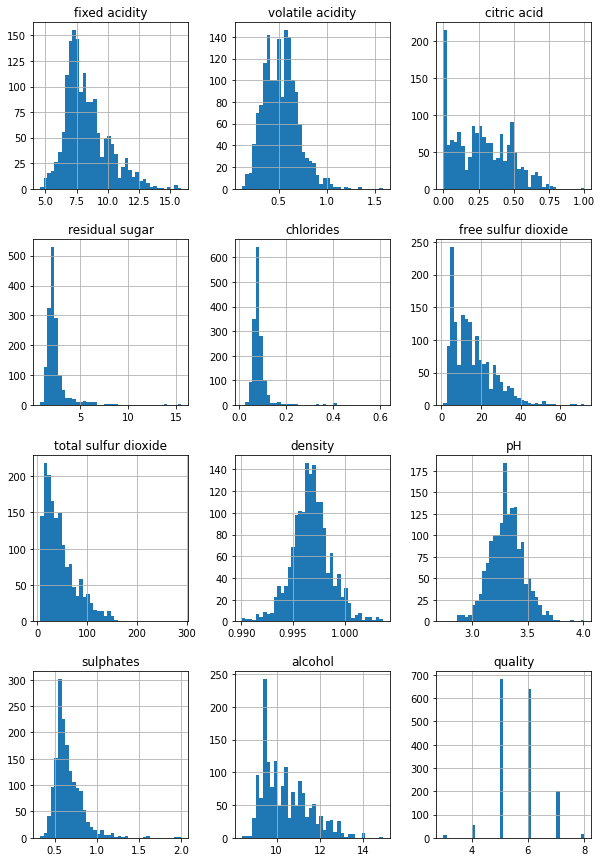

In [15]:
df.hist(bins=40, figsize=(10,15))
plt.show()

### Human wine preferences scores varied from 3 to 8, so it’s straightforward to categorize answers into ‘bad’ or ‘good’ quality of wines

In [16]:
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [17]:
#### Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [18]:
# Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

0    1382
1     217
Name: quality, dtype: int64


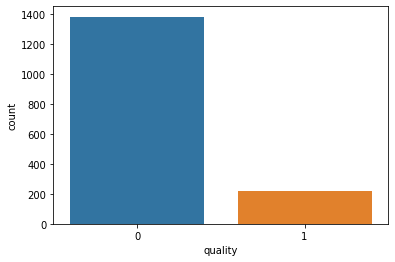

In [19]:
# Bad becomes 0 and good becomes 1
df['quality'] = label_quality.fit_transform(df['quality'])
print(df['quality'].value_counts())
sns.countplot(df['quality'])
plt.show()

### Model Development

In [20]:
x = df.drop(['quality'], axis=1)
y = df['quality']


In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 50)


In [22]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [25]:
cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

### Decision Tree

In [50]:
dtc = DecisionTreeClassifier(max_depth=200)
dtc.fit(x_train, y_train)
preds = dtc.predict(x_test)
score = dtc.score(x_test, y_test)
score

0.855

In [51]:
preds[:5]

array([0, 0, 0, 0, 0])

In [52]:
y_test[:5]


453     1
1415    0
1242    0
885     0
488     1
Name: quality, dtype: int64

### look for best depth values

In [53]:
Ks = 100
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    dtc = DecisionTreeClassifier(max_depth = n).fit(x_train,y_train)
    yhat=dtc.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.8925, 0.8825, 0.8975, 0.8875, 0.895 , 0.9   , 0.8825, 0.88  ,
       0.8925, 0.895 , 0.87  , 0.86  , 0.8725, 0.8575, 0.87  , 0.88  ,
       0.8525, 0.87  , 0.86  , 0.865 , 0.8725, 0.8675, 0.8525, 0.85  ,
       0.8725, 0.865 , 0.8625, 0.86  , 0.89  , 0.8625, 0.8775, 0.8625,
       0.86  , 0.865 , 0.8875, 0.865 , 0.8725, 0.855 , 0.8575, 0.8575,
       0.8775, 0.85  , 0.88  , 0.85  , 0.87  , 0.86  , 0.87  , 0.8725,
       0.8775, 0.85  , 0.865 , 0.88  , 0.87  , 0.87  , 0.8675, 0.88  ,
       0.8575, 0.8475, 0.8675, 0.8725, 0.86  , 0.8725, 0.8625, 0.8475,
       0.8775, 0.845 , 0.865 , 0.8825, 0.8475, 0.8725, 0.8675, 0.8725,
       0.8425, 0.8575, 0.865 , 0.8525, 0.8425, 0.865 , 0.8675, 0.8575,
       0.8675, 0.86  , 0.875 , 0.885 , 0.84  , 0.8575, 0.88  , 0.865 ,
       0.85  , 0.89  , 0.8725, 0.8675, 0.8775, 0.8425, 0.865 , 0.86  ,
       0.875 , 0.86  , 0.86  ])

In [49]:
print( "The best accuracy was with", mean_acc.max(), "with depth =", mean_acc.argmax()+1)


The best accuracy was with 0.8975 with depth = 3


### Decision Tree Classification Report

In [54]:
cf = metrics.classification_report(preds,y_test)

print(cf)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       349
           1       0.42      0.35      0.38        51

    accuracy                           0.85       400
   macro avg       0.66      0.64      0.65       400
weighted avg       0.85      0.85      0.85       400



### Random Forest Classifier

In [55]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
preds = rfc.predict(x_test)
score = rfc.score(x_test,y_test)
score

0.9225

In [56]:
preds[:5]

array([0, 0, 0, 0, 0])

In [57]:
y_test[:5]

453     1
1415    0
1242    0
885     0
488     1
Name: quality, dtype: int64

In [58]:
Ks = 100
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    rfc = RandomForestClassifier(n_estimators = n).fit(x_train,y_train)
    yhat=dtc.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86,
       0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86,
       0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86,
       0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86,
       0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86,
       0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86,
       0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86,
       0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86,
       0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86])

In [59]:
print( "The best accuracy was with", mean_acc.max(), "with n_estimator =", mean_acc.argmax()+1)


The best accuracy was with 0.86 with n_estimator = 1


### Random Forest Classification Report

In [60]:
cf = metrics.classification_report(preds,y_test)
print(cf)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       366
           1       0.53      0.68      0.60        34

    accuracy                           0.92       400
   macro avg       0.75      0.81      0.78       400
weighted avg       0.93      0.92      0.93       400



### ROC curve plot

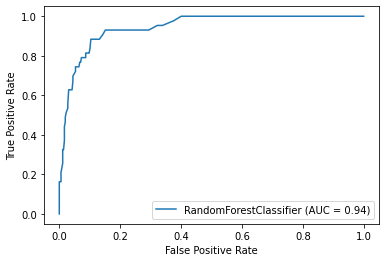

In [61]:
rfc_plot = metrics.plot_roc_curve(rfc, x_test,y_test)


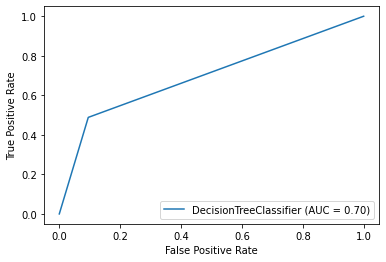

In [62]:
dtc_plot = metrics.plot_roc_curve(dtc, x_test,y_test)


### Cross Validation Score Approach

In [63]:
dtc_eval = cross_val_score(dtc, x_test, y_test, cv=10)
print('Cross Val Score accuracy is {:.2f}'.format(dtc_eval.mean()))


Cross Val Score accuracy is 0.86


In [64]:
rfc_eval = cross_val_score(rfc, x_test, y_test, cv=10)
print('Cross Val Score accuracy is {:.2f}'.format(rfc_eval.mean()))

Cross Val Score accuracy is 0.91


### GridSearchCV

In [ ]:
#For DecisionTree

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dtc_cv = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=10)
dtc_cv.fit(x_test, y_test)

In [66]:
dtc_cv.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [74]:
dtc_new = DecisionTreeClassifier(criterion='entropy', max_depth = 10)
dtc_new.fit(x_train,y_train)
new_score  = dtc_new.score(x_test, y_test)
new_score

0.9

In [68]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
rfc_cv.fit(x_test, y_test)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=99, n_jobs=None,
                                              oob_score=False,
                                              random

In [69]:
rfc_cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 500}

In [75]:
rfc = RandomForestClassifier(criterion='gini',
 max_depth=5,
 max_features='log2',
 n_estimators=500)
rfc.fit(x_train, y_train)
new_score = rfc.score(x_test,y_test)
new_score

0.9075